# Effect of Loan Variables on Loan Amount and Loan Status
## by Bayonle Ibukun

## Investigation Overview
I focused on analyzing the relationship between the loan amount and loan status. I also explored how loan term,EmploymentStatus,IncomeRange, Prosper score, and Lenderyield influenced the loan amount and loan status. My aim is to identify what factors determine the loan amount that lenders are willing to grant and what factors influence the fate of the loan. 


## Dataset Overview

The dataset contains 103,227 entries and includes 29 distinct features. The analysis is primarily centered on a few key features, including LoanOriginalAmount, loan status, Prosper score, Loan term, Listing Category, Employment State, Income Range, and IsHomeOwner. It should be noted that the dataset has been preprocessed and refined, through the removal of missing or erroneous values, to enhance the reliability and accuracy of the results.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#basecolor
base_color = sns.color_palette()[0]

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
prosperLoan_new = pd.read_csv('prosperLoan_new')

## Loan Amount Distribution

The majority of loans given are for amounts below 5,000 dollars. Additionally, as the loan amount increases, there is generally a decrease in the likelihood of the loan being approved as there is a reduction in the number of loans given out as the amount of loan increased. However, there is a slight deviation at the 15,000 dollar mark.

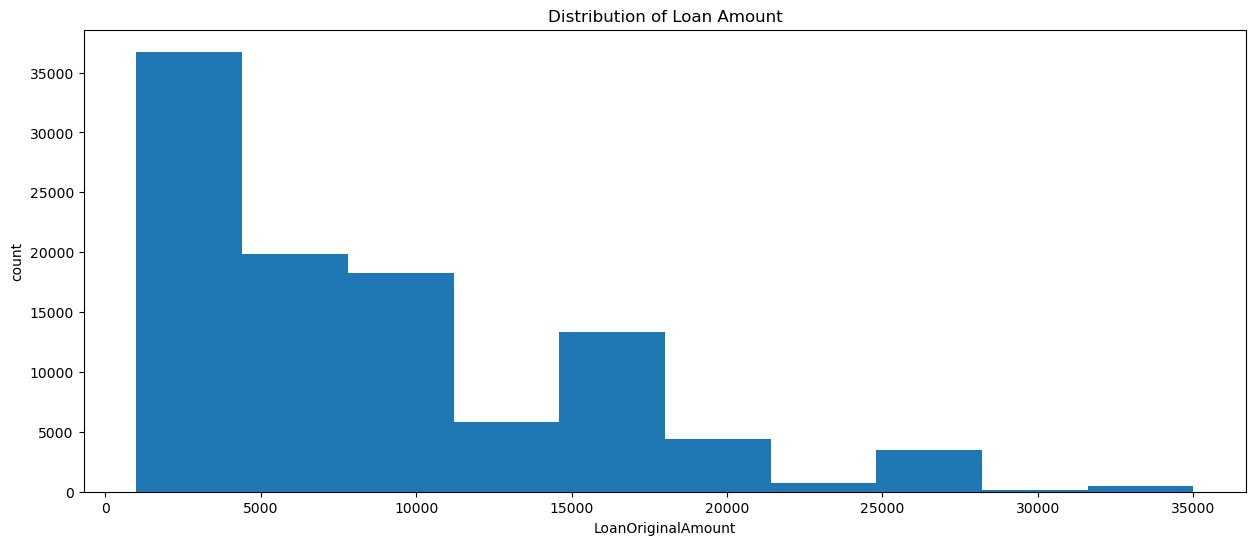

In [4]:
plt.figure(figsize=[15, 6])
bins = np.arange(0, prosperLoan_new['LoanOriginalAmount'].max()+500, 500)
plt.hist(data = prosperLoan_new, x = 'LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count')
plt.title('Distribution of Loan Amount')
plt.show()

### Loan Staus 

Loans that are still active make up the largest portion, with completed loans coming in second.

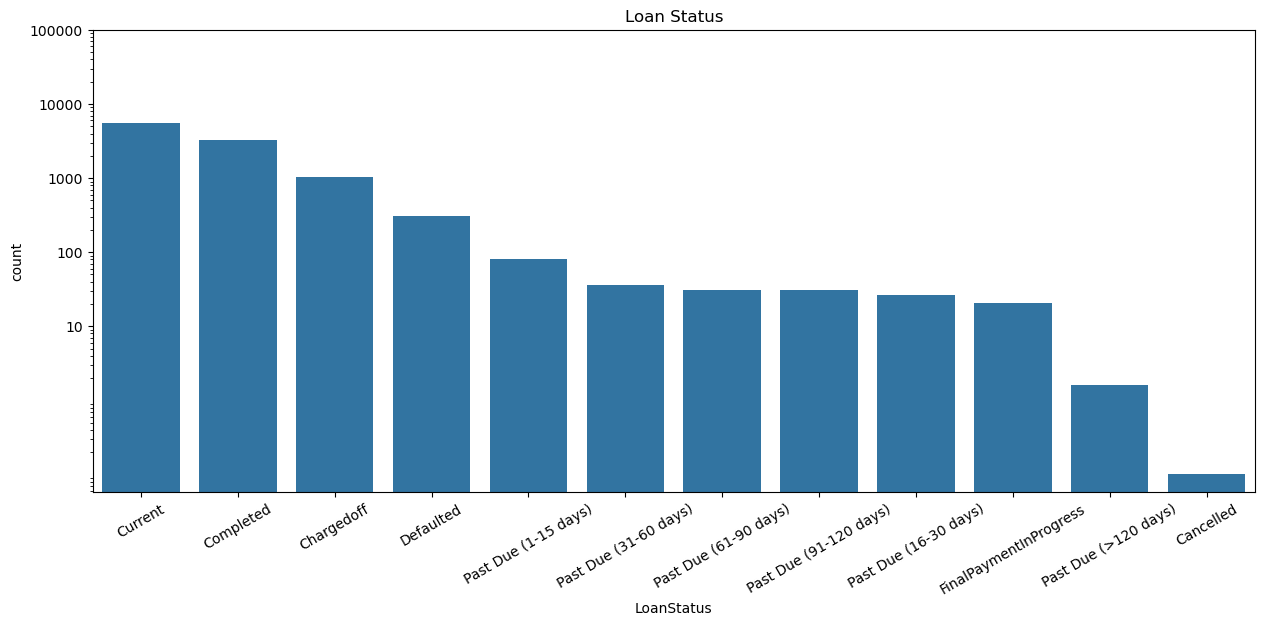

In [5]:
plt.figure(figsize=[15, 6])
gen_order = prosperLoan_new.LoanStatus.value_counts().index
sns.countplot(data = prosperLoan_new, x = 'LoanStatus',color = base_color,order = gen_order)
plt.yscale('log')
plt.title('Loan Status')
plt.yticks([10e1,10e2,10e3,10e4,10e5],[10,100,1000,10000,100000])
plt.xticks(rotation = 30)
plt.show()

##  Loan Amount Distribution, Loan Staus and Term

Active loans tend to have the highest loan amounts because lenders are cautious about granting high loans to borrowers who can repay the loan. The low loan amount of canceled loans could indicate that these loans were not approved because the borrower did not meet the lender's requirements. Defaulted loans tend to have slightly higher loan amounts than completed loans, which could indicate that the borrowers were not able to meet their repayment obligations.  

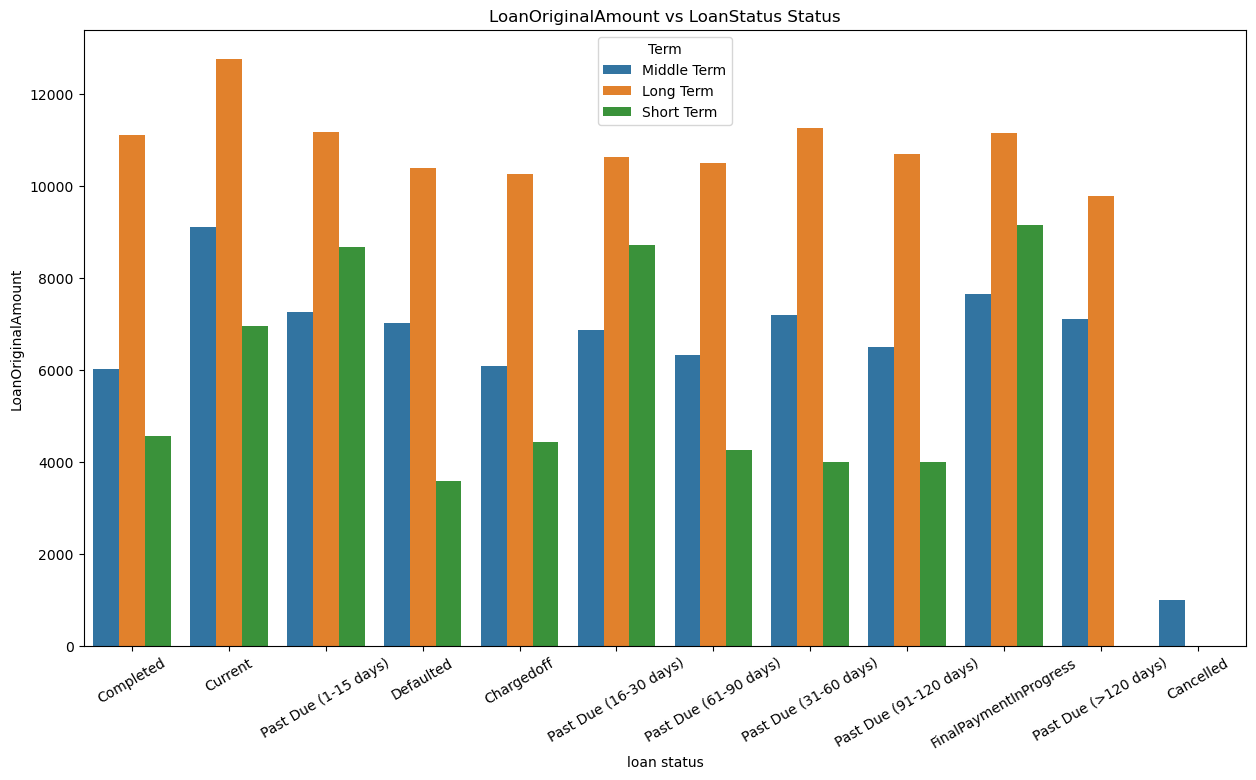

In [6]:
plt.figure(figsize=[15, 8])
sns.barplot(data=prosperLoan_new,y='LoanOriginalAmount',x='LoanStatus',ci =0,hue = 'Term');
plt.xlabel('loan status');
plt.ylabel('LoanOriginalAmount');
plt.xticks(rotation = 30)
plt.title('LoanOriginalAmount vs LoanStatus Status');


##  LoanOriginalAmount, MonthlyLoanPayment and LoanTerm

There is a significant positive correlation between the loan amount and the monthly payment across all types of loans, with a particularly strong association for short-term loans. This indicates that an increase in the loan amount results in a corresponding increase in the monthly payment for short-term loans. Compared to other loan categories, short-term loans are more probable to be paid back, potentially due to their lower loan amounts and higher monthly payments. As a result, borrowers can more quickly satisfy their loan obligations, decreasing the probability of default.

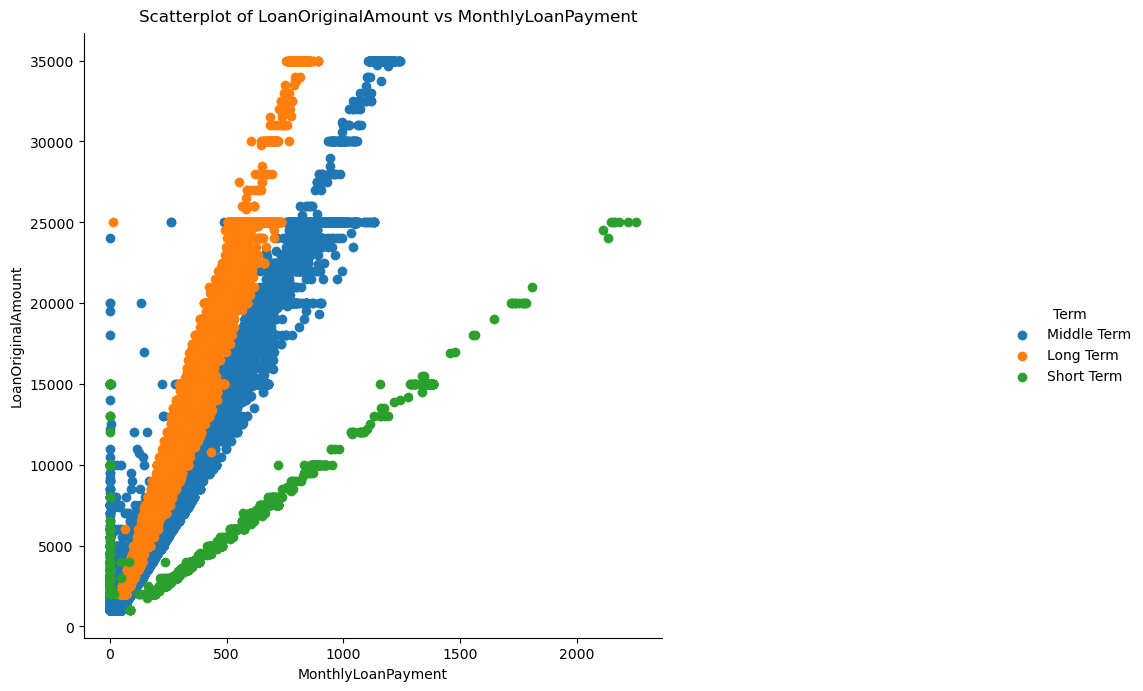

In [7]:
g = sns.FacetGrid(data = prosperLoan_new, hue = 'Term')
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount')
g.add_legend();
g.fig.set_size_inches(15, 8)
g.fig.suptitle("Scatterplot of LoanOriginalAmount vs MonthlyLoanPayment ")
plt.show()

### Relation between ListingCategory & LoanOriginalAmount & Term
Many short-term loans were obtained to fund eco-friendly initiatives, such as green loans, while a considerable number of long-term loans were obtained for different reasons, such as debt consolidation, weddings, and various other purposes.

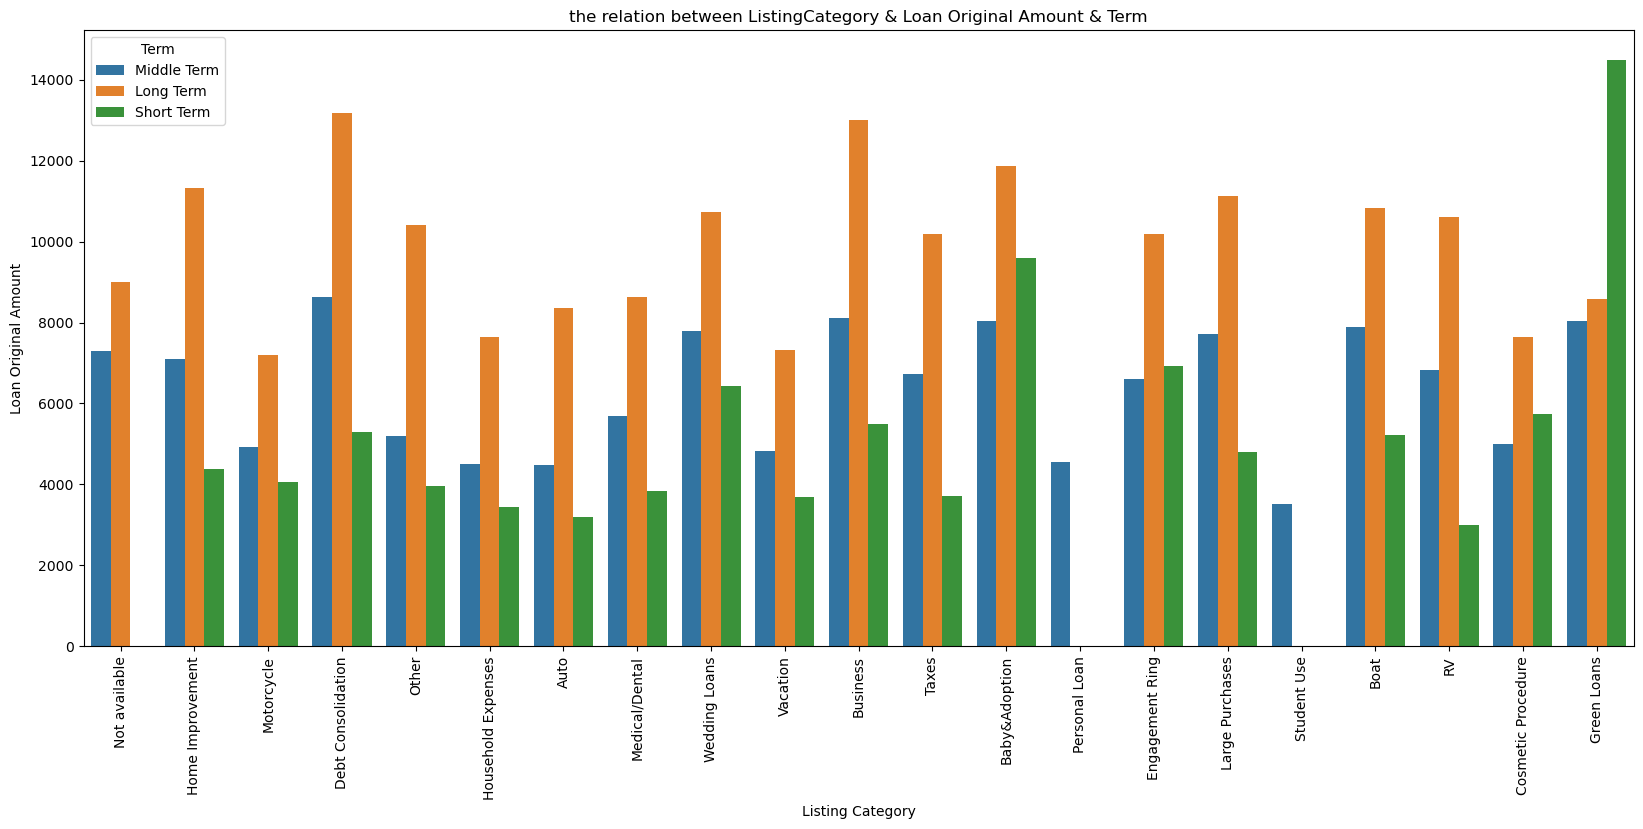

In [8]:
plt.figure(figsize=[20,8])
sns.barplot(data= prosperLoan_new,x="ListingCategory",y="LoanOriginalAmount",hue="Term",ci = 0);
plt.xlabel("Listing Category");
plt.ylabel("Loan Original Amount");
plt.title("the relation between ListingCategory & Loan Original Amount & Term");
plt.xticks(rotation =90);

## Loan Original Amount Across Loan Term and Prosper Score

short-term loans typically have smaller loan amounts, and the borrower's ProsperScore rating may not have a significant impact on these loans. Middle-term loans with high ProsperScore ratings are more likely to be approved for larger loan amounts, and long-term loans with high ProsperScore ratings are the most preferred for obtaining the largest loan amounts. 

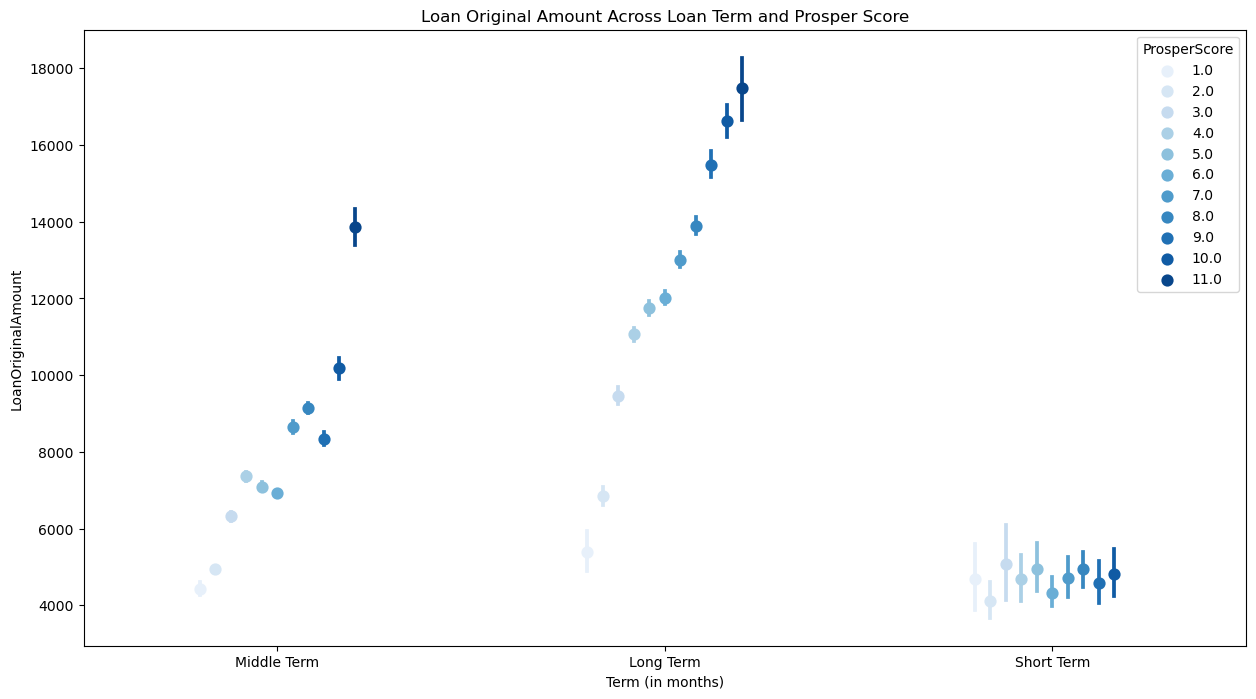

In [9]:
plt.figure(figsize = [15, 8])
sns.pointplot(data = prosperLoan_new, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Original Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('Term (in months)')
plt.show()

## LoanStatus, LenderYield and EmploymentStatus

Excluding canceled loans, completed loans have the lowest lender yield across all loan statuses. Borrowers who are retired or part-time workers tend to have the lowest lender yield among borrowers with different employment statuses. However, for loans that are past due, retired or part-time workers tend to have the highest lender yield, indicating they may be facing challenges in making timely payments.

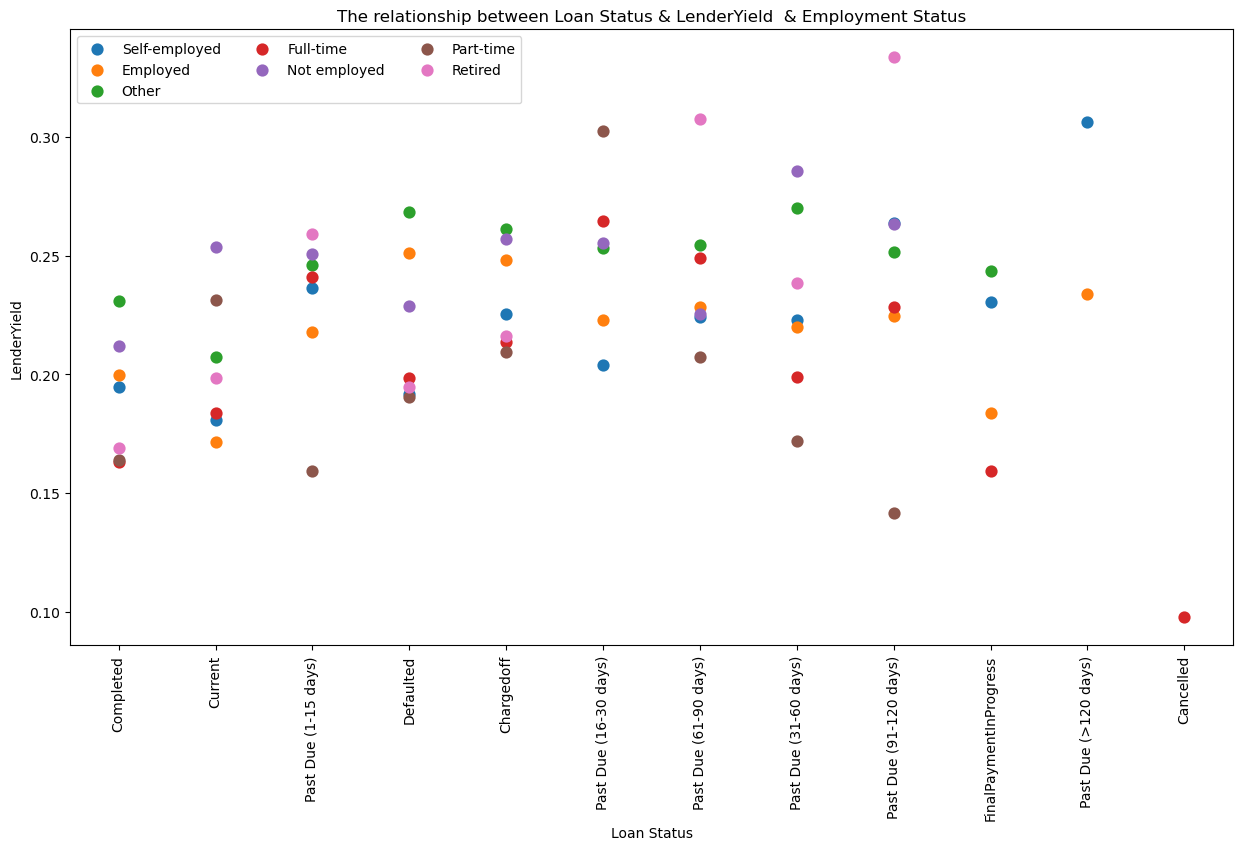

In [10]:
plt.figure(figsize=[15,8])
sns.pointplot(data= prosperLoan_new,x="LoanStatus",y="LenderYield",hue="EmploymentStatus",linestyles="",ci = 0);
plt.xticks(rotation =90);
plt.legend(ncol=3);
plt.ylabel("LenderYield")
plt.xlabel("Loan Status");
plt.title("The relationship between Loan Status & LenderYield  & Employment Status");

## IncomeRange and LoanOriginalAmount, IsHomeOwner and LoanOriginalAmount

individuals with lower income tend to apply for loans of less than 10,000 dollars, while those with higher income ranges of 50,000 dollars or more are more likely to be approved for higher loan amounts. Additionally, homeowners are more likely to secure higher loan amounts compared to non-homeowners, as non-homeowners mostly get loans under the 10,000 dollar mark. 

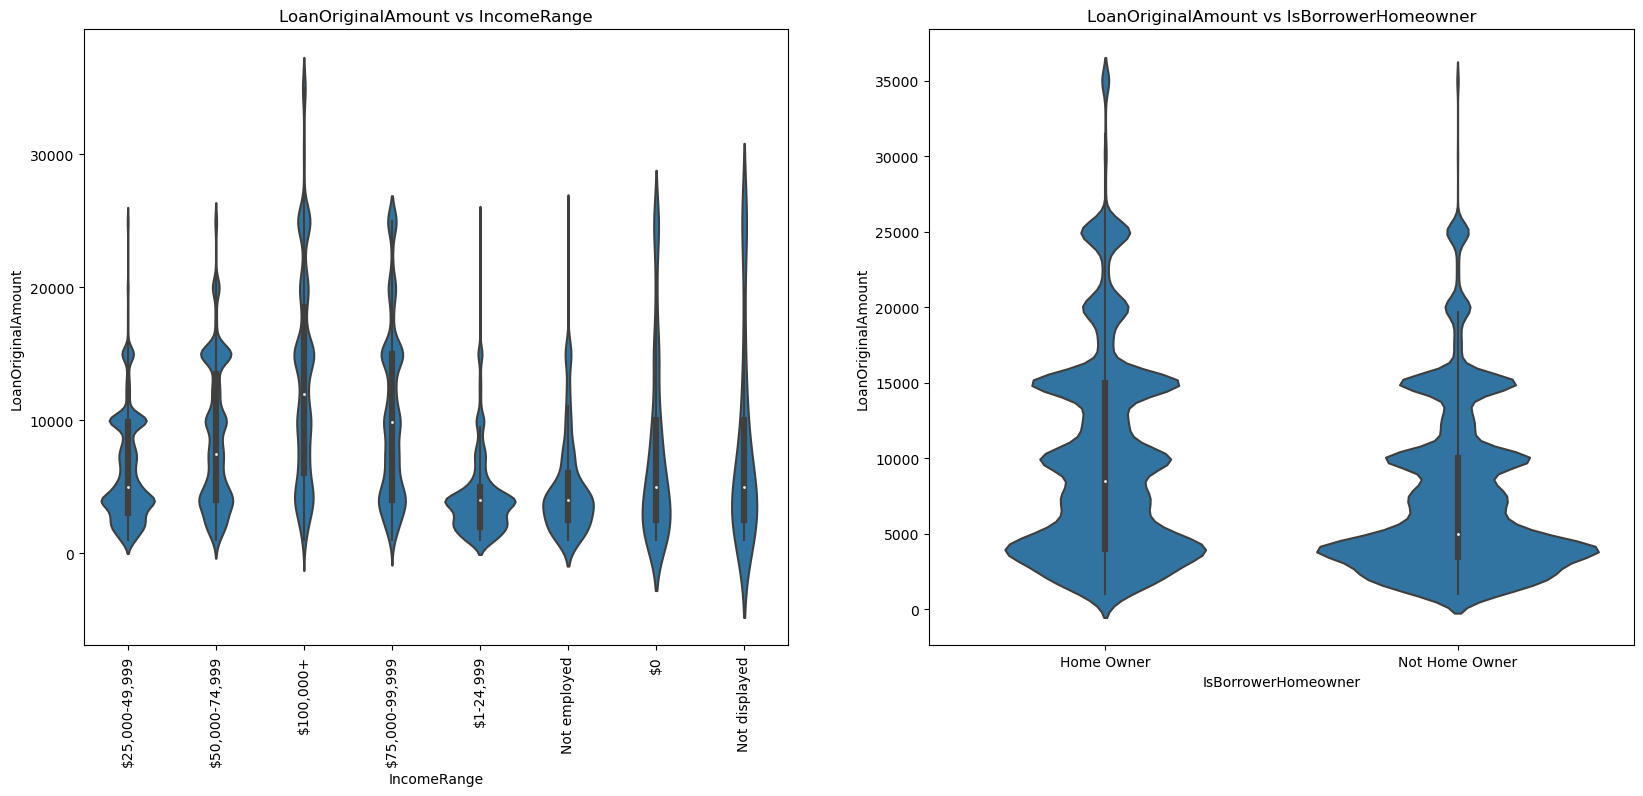

In [8]:
plt.figure(figsize = [20, 8])
plt.subplot(1, 2, 1)
sns.violinplot(data = prosperLoan_new, x = 'IncomeRange', y = 'LoanOriginalAmount',color=base_color)
plt.xticks(rotation = 90)

plt.title('LoanOriginalAmount vs IncomeRange')
plt.subplot(1, 2, 2)
sns.violinplot(data = prosperLoan_new, x = 'IsBorrowerHomeowner', y = 'LoanOriginalAmount',color=base_color)
plt.title('LoanOriginalAmount vs IsBorrowerHomeowner')
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_ProsperLoan.ipynb --to slides --post serve --no-input --no-prompt